In [30]:
import pandas as pd
from datetime import datetime
import plotnine

In [31]:
# Set variables:
NIWA_MD = 2.4 
WQO = 0.14

In [32]:
#import concentration data
df = pd.read_csv('data/catchment_NNO3.csv')
df.head()

,GSnum,name,ts,Value,Quality
0,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T15:30:00Z,0.929,1020
1,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T15:45:00Z,0.745,1020
2,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T16:00:00Z,0.630,1020
3,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T16:15:00Z,0.620,1020
4,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T16:30:00Z,0.586,1020


In [33]:
#import site information
sitelist = pd.read_csv('data/sitelist.csv')
sitelist.head()

,Basin,Catchment,GSnum,Site name,Site code,Latitude (GDA2020),Longitude (GDA2020),Site type,Stream order,Stream habit
0,Herbert,Herbert River,1160115,Broadwater Creek at Day Use,BCD,-18.41633,145.94393,Reference,4,Natural
1,Herbert,Catherina Creek,1160116,Catherina Creek at Catherina Creek Road,CCC,-18.59907,146.23627,End of System,3,Natural
2,Herbert,Herbert River,1160117,Elphinstone Creek at Copley Road,ECC,-18.46506,145.96146,Impact,4,Natural
3,Herbert,Francis Creek,1160118,Francis Creek at Weir,FCW,-18.76673,146.13407,Impact,5,Ephemeral
4,Herbert,Herbert River,1160119,Herbert River at John Row Bridge,HRJ,-18.62831,146.16486,End of System,7,Tidal


In [34]:

# Subset to include only 'GSnum' and 'Value' columns
subset_df = df[['GSnum', 'Value']]
# Group by 'GSnum' and calculate the median for the 'Value' and 'Quality' columns
median_summary = subset_df.groupby('GSnum').median().reset_index()
# Rename the 'Value' column to 'median'
median_summary.rename(columns={'Value': 'median'}, inplace=True)
# Perform a left join of the original DataFrame with the median summary DataFrame
merged_df = pd.merge(df, median_summary, on='GSnum', how='left')

merged_df = pd.merge(merged_df, sitelist[['GSnum', 'Site type']], on='GSnum', how='left')
# Concatenate columns with separator
merged_df['combined_col'] = merged_df['Site type'] + ' // ' + merged_df['name']
merged_df.head()

,GSnum,name,ts,Value,Quality,median,Site type,combined_col
0,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T15:30:00Z,0.929,1020,0.081,End of System,End of System // Catherina Creek at Catherina ...
1,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T15:45:00Z,0.745,1020,0.081,End of System,End of System // Catherina Creek at Catherina ...
2,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T16:00:00Z,0.630,1020,0.081,End of System,End of System // Catherina Creek at Catherina ...
3,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T16:15:00Z,0.620,1020,0.081,End of System,End of System // Catherina Creek at Catherina ...
4,1160116,Catherina Creek at Catherina Creek Road,2023-01-01T16:30:00Z,0.586,1020,0.081,End of System,End of System // Catherina Creek at Catherina ...


In [50]:
from plotnine import *

/Users/cameronroberts/Documents/GitHub/water_joyful_plot/.venv/lib/python3.11/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


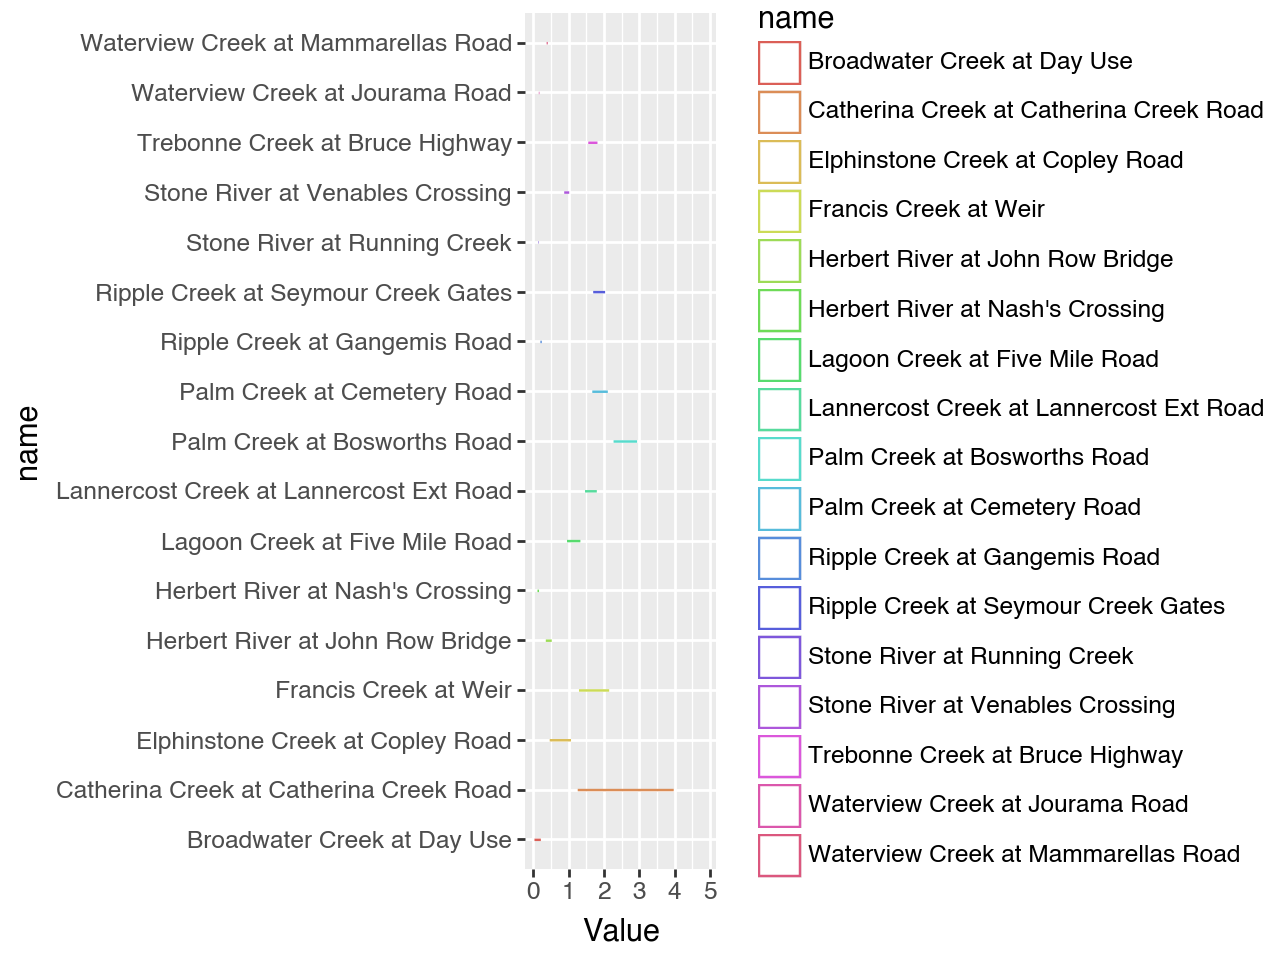

In [60]:
(
    ggplot(merged_df, aes(y="name", x="Value", color="name")) +
    geom_violin() 
    #geom_vline(aes(xintercept = NIWA_MD, linetype = "dashed"), size = 1, color = "red") +
    #geom_vline(aes(xintercept = WQO, linetype = "dashed"), size = 1, color = "blue") 
)

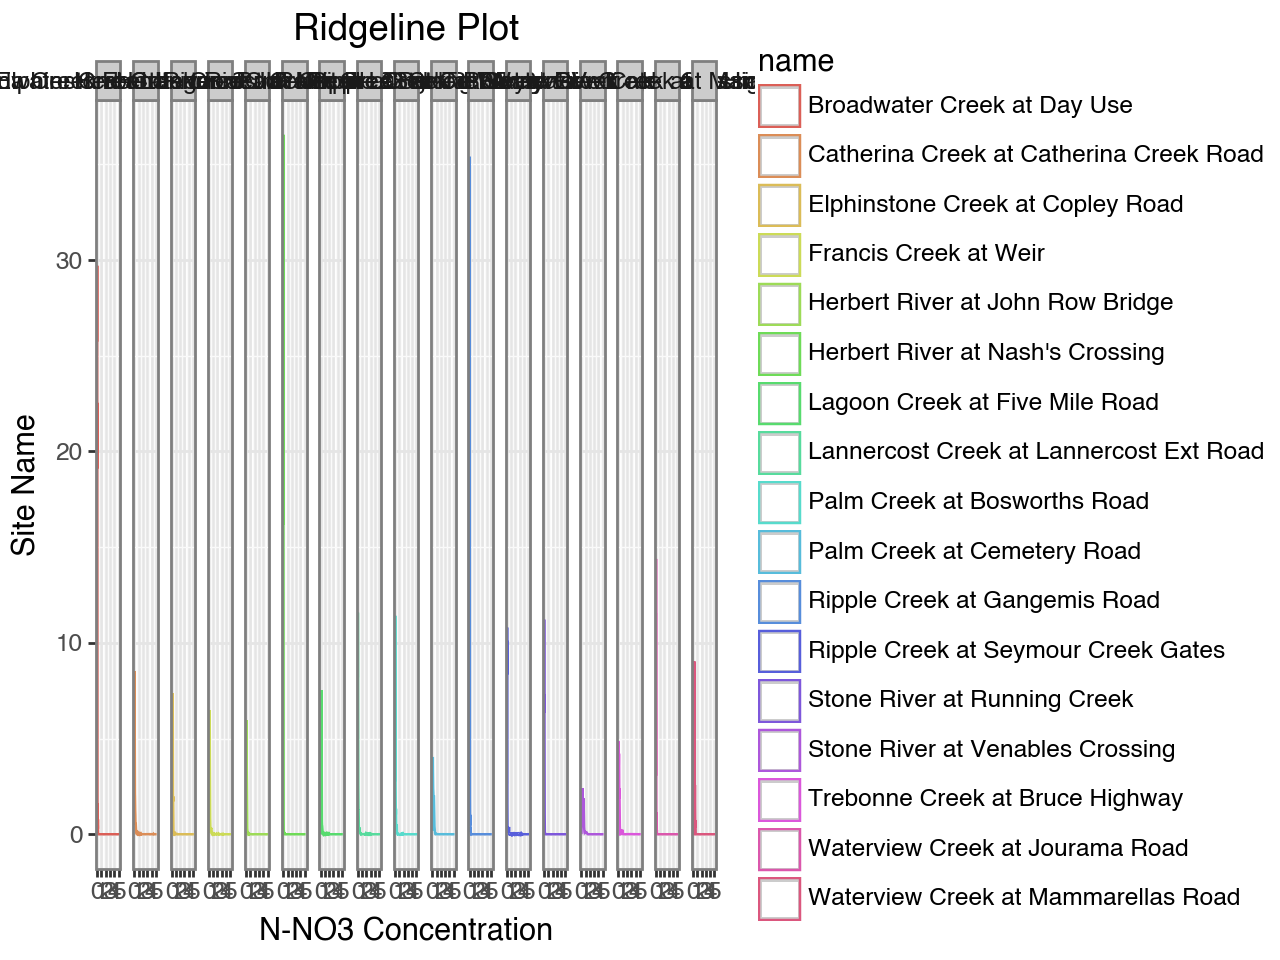

In [58]:
(ggplot(merged_df, aes(x='Value', color='name'))
        + geom_density(alpha=0.5)
        + facet_grid('~ name')  # Plot for each group
        + labs(x="N-NO3 Concentration", y="Site Name", title='Ridgeline Plot')
        + theme_bw())